### Data Exploration and Instantiation

In [1]:
# Importing the required libraries and functions

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bike_data = pd.read_csv("data.csv") #load the data
bike_data.head() # show the top rows of the dataframe

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


bike_data.describe

In [3]:
bike_data.shape #display the shape of the data

(730, 16)

In [4]:
bike_data.info() #general information about the dataset. 
# There are no null values in the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bike_data.describe() #summary statistics about our variables

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


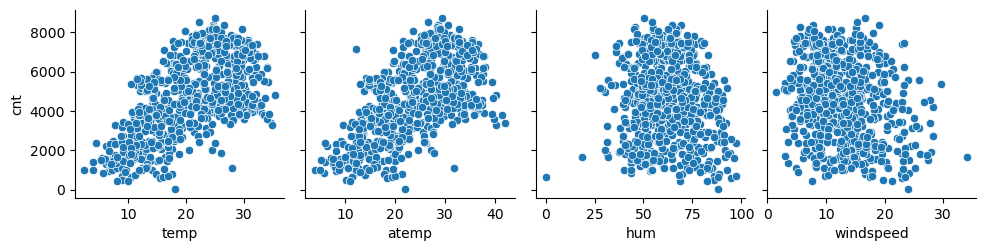

In [6]:
sns.pairplot(bike_data, x_vars=['temp', 'atemp', 'hum', 'windspeed'], y_vars='cnt') #pairplot of all variables to check patterns against count

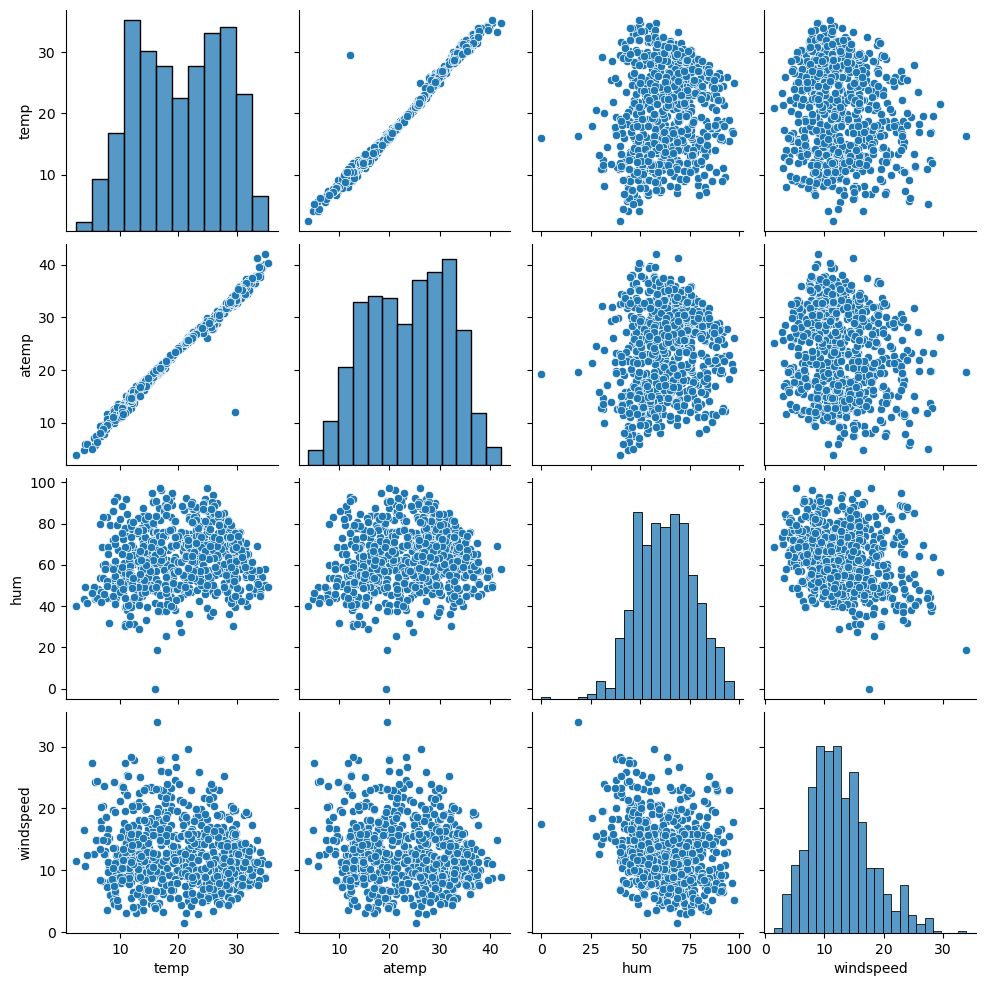

In [7]:
sns.pairplot(data=bike_data, vars=['temp', 'atemp', 'hum', 'windspeed']) #pairplot for numerical variables to check for multicolinearity

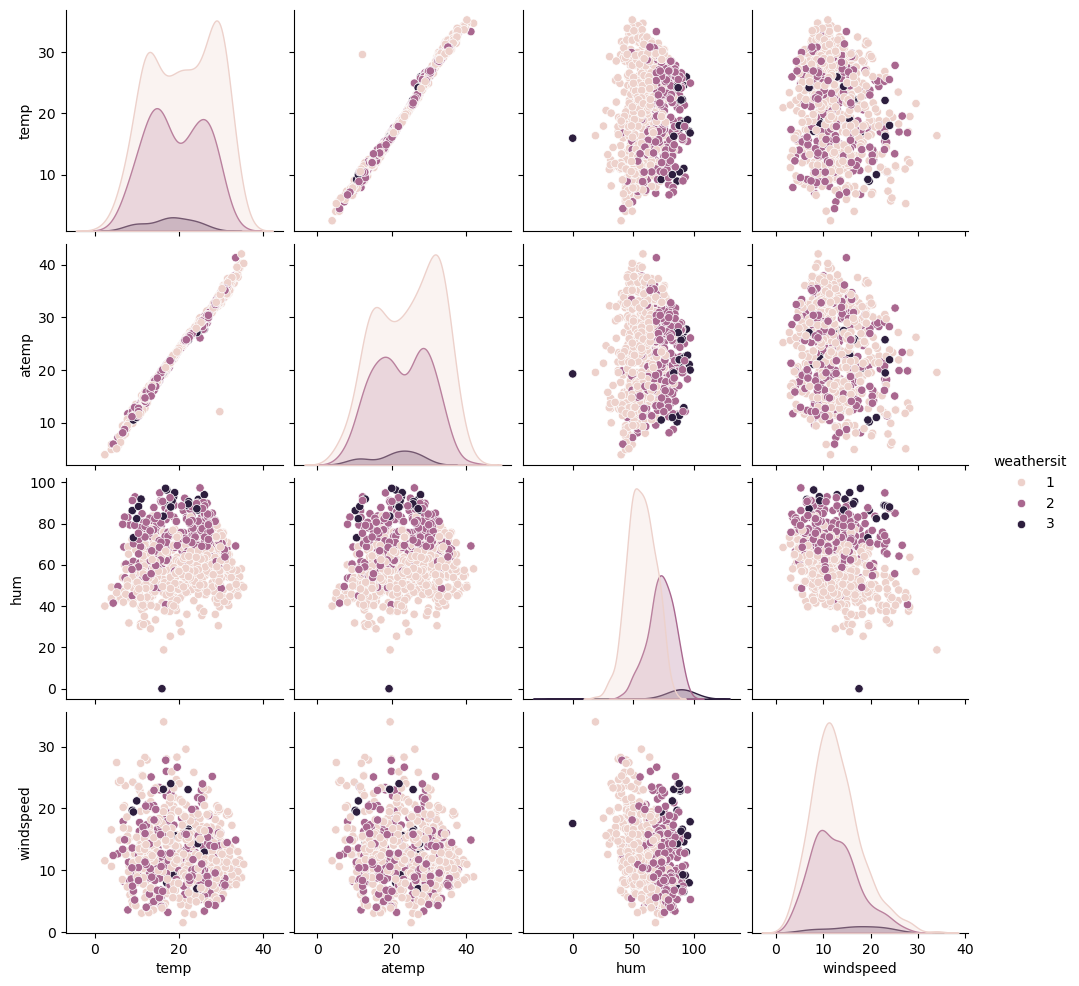

In [8]:
# Visualizing the numeric variables and how they are related to different weather conditions
sns.pairplot(data=bike_data, vars=['temp', 'atemp', 'hum', 'windspeed'], hue="weathersit") #visualizing the data to see any weather patterns

<Axes: xlabel='holiday', ylabel='cnt'>

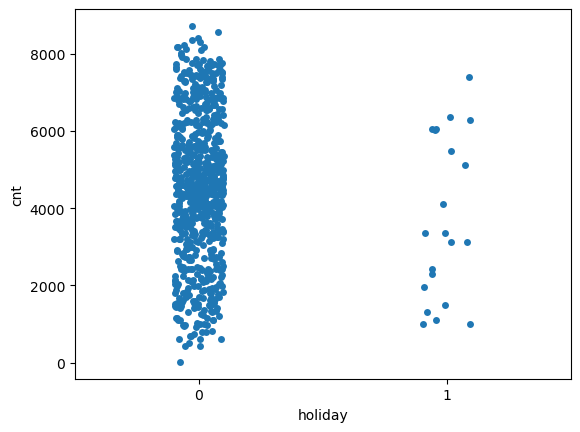

In [9]:
# Exploring the holiday categorical data. 
sns.stripplot(data=bike_data, x="holiday", y="cnt") #visualizing the holidays to see if there is any impact of holidays. 

<Axes: xlabel='weekday', ylabel='cnt'>

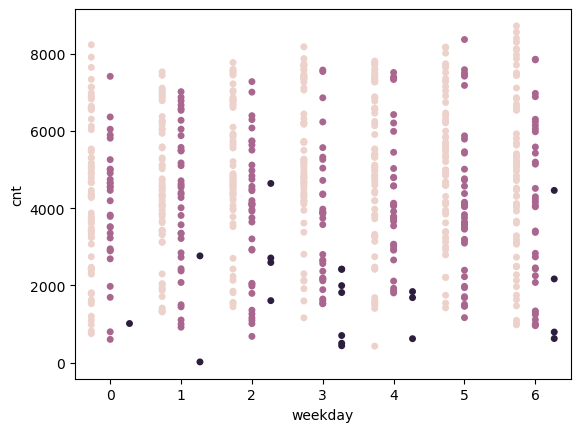

In [10]:
# Visualizing the cnt instances with respect to the day during which they occur. 
sns.stripplot(data=bike_data, x="weekday", hue="weathersit", y="cnt", dodge=True, jitter=False, legend=False) # Visualizing the count based on weather and day of the week

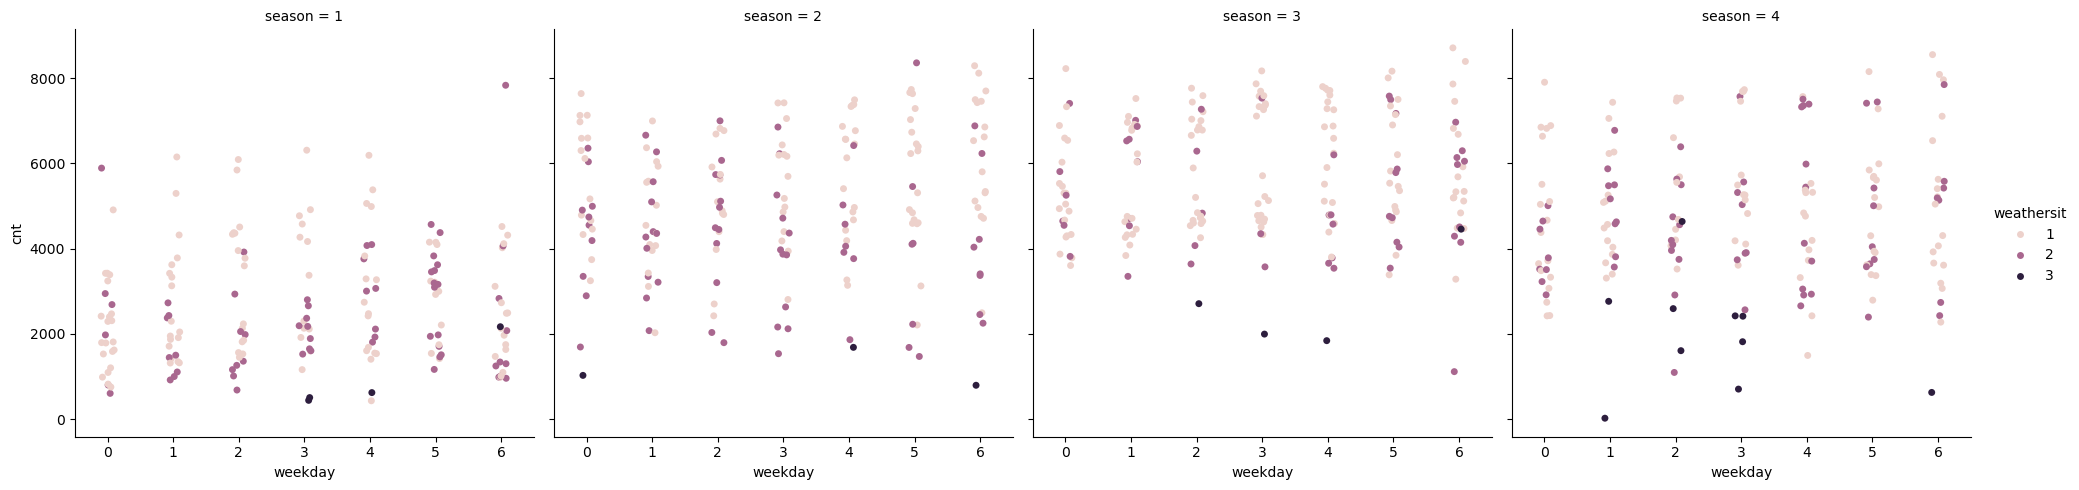

In [11]:
# Visualizing the same data as above, but now for every different season
sns.catplot(data=bike_data, x="weekday", hue="weathersit", y="cnt", col="season")

<Axes: xlabel='weathersit', ylabel='cnt'>

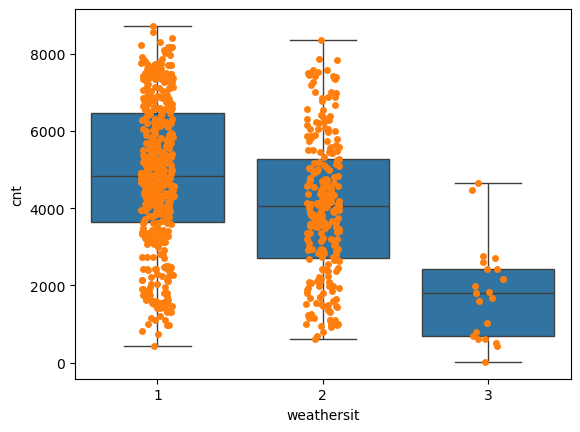

In [12]:
# Looking at how the data is spread for different weather conditions
sns.boxplot(data=bike_data, x="weathersit", y="cnt")
sns.stripplot(data=bike_data, x="weathersit", y="cnt")

## Data Preprocessing
* Dropping the temp column as it is multicollinear with atemp column. We will retain the atemp column instead. 
* Dropping the casual, and registered column as we are only interested in total count
* Dropping the instant, dteday columns as they are not required to create our  model. 

In [13]:
bike_data_processed = bike_data.drop(['instant', 'dteday', 'casual', 'registered'], axis = 1)

In [14]:
bike_data_processed.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


#### Dealing with Categorical Data
* Replacing numerical values of categorical data with the actual names they refer to.
* For weathersit, we have used short names to refer to the actual longer values

In [15]:
bike_data_processed['season'] = bike_data_processed['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

In [16]:
bike_data_processed['mnth'] = bike_data_processed['mnth'].map({1: 'january', 2: 'february', 3: 'march', 4: 'april', 5: 'may', 6: 'june', 7: 'july', 8: 'august', 9: 'september', 10: 'october', 11: 'november', 12: 'december'})

In [17]:
bike_data_processed['weekday'] = bike_data_processed['weekday'].map({0: 'sunday', 1: 'monday', 2: 'tuesday', 3: 'wednesday', 4: 'thursday', 5: 'friday', 6: 'saturday'})

In [18]:
bike_data_processed['weathersit'] = bike_data_processed['weathersit'].map({1: 'Clear', 2: 'Cloudy', 3: 'Light Rain, Snow', 4: 'Heavy Rain, Snow'})

In [19]:
bike_data_processed.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,january,0,saturday,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,january,0,sunday,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,january,0,monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,january,0,tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,january,0,wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


#### Creating Dummy Variables for Categorical Columns
* season, mnth, weekday, and weathersit columns each create dummy columns based on the categorical values. 
* After forming the dummy columns, we drop these categorical columns from our data set. 

In [20]:
categorical_columns = bike_data_processed[['season', 'mnth', 'weekday', 'weathersit']] 

In [21]:
dummy_columns = pd.get_dummies(categorical_columns, drop_first = True, dtype = int) # creating dummy columns for categorical variables

In [22]:
bike_data_processed = bike_data_processed.drop(['season', 'mnth', 'weekday', 'weathersit'], axis = 1) # dropping the categorical columns

In [23]:
bike_data_processed = pd.concat([dummy_columns, bike_data_processed], axis = 1) # concatenating the dummy variables to our dataset

In [24]:
bike_data_processed.head()

,season_spring,season_summer,season_winter,mnth_august,mnth_december,mnth_february,mnth_january,mnth_july,mnth_june,mnth_march,...,weathersit_Cloudy,"weathersit_Light Rain, Snow",yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


### Correlation of our feature variables with our target variable

In [25]:
bike_data_processed.corr()['cnt'] # correlation of our feature variables with count

season_spring                 -0.561702
season_summer                  0.145325
season_winter                  0.064619
mnth_august                    0.182100
mnth_december                 -0.173878
mnth_february                 -0.273848
mnth_january                  -0.367167
mnth_july                      0.166236
mnth_june                      0.195568
mnth_march                    -0.128456
mnth_may                       0.132553
mnth_november                 -0.040344
mnth_october                   0.108846
mnth_september                 0.194664
weekday_monday                -0.035991
weekday_saturday               0.009012
weekday_sunday                -0.059146
weekday_thursday               0.033551
weekday_tuesday                0.000560
weekday_wednesday              0.014012
weathersit_Cloudy             -0.170686
weathersit_Light Rain, Snow   -0.240602
yr                             0.569728
holiday                       -0.068764
workingday                     0.062542


In [26]:
bike_data_processed.corr()

,season_spring,season_summer,season_winter,mnth_august,mnth_december,mnth_february,mnth_january,mnth_july,mnth_june,mnth_march,...,weathersit_Cloudy,"weathersit_Light Rain, Snow",yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
season_spring,1.000000e+00,-3.320989e-01,-3.248593e-01,-1.742860e-01,7.652343e-02,5.038592e-01,5.325406e-01,-1.742860e-01,-1.711958e-01,2.817311e-01,...,0.029198,-0.022400,2.288403e-16,0.034642,-0.027615,-0.619408,-0.624772,-0.184884,0.178880,-0.561702
season_summer,-3.320989e-01,1.000000e+00,-3.296500e-01,-1.768562e-01,-1.768562e-01,-1.673311e-01,-1.768562e-01,-1.768562e-01,2.857575e-01,7.211912e-02,...,0.040011,-0.043283,-1.012369e-16,-0.024408,0.015091,0.154876,0.163151,-0.002870,0.097421,0.145325
season_winter,-3.248593e-01,-3.296500e-01,1.000000e+00,-1.730008e-01,2.847396e-01,-1.636834e-01,-1.730008e-01,-1.730008e-01,-1.699334e-01,-1.730008e-01,...,0.033857,0.093128,-1.088028e-16,0.016785,-0.004623,-0.225590,-0.205634,0.163908,-0.135612,0.064619
mnth_august,-1.742860e-01,-1.768562e-01,-1.730008e-01,1.000000e+00,-9.281437e-02,-8.781560e-02,-9.281437e-02,-9.281437e-02,-9.116872e-02,-9.281437e-02,...,-0.019680,-0.052432,5.586298e-17,-0.052432,0.038238,0.354648,0.330939,0.021580,-0.069125,0.182100
mnth_december,7.652343e-02,-1.768562e-01,2.847396e-01,-9.281437e-02,1.000000e+00,-8.781560e-02,-9.281437e-02,-9.281437e-02,-9.116872e-02,-9.281437e-02,...,0.063484,0.035760,8.410213e-17,0.006363,-0.014589,-0.285664,-0.277484,0.082200,-0.054616,-0.173878
mnth_february,5.038592e-01,-1.673311e-01,-1.636834e-01,-8.781560e-02,-8.781560e-02,1.000000e+00,-8.781560e-02,-8.781560e-02,-8.625858e-02,-8.781560e-02,...,-0.009487,-0.018814,-2.435955e-16,0.011980,-0.003093,-0.310626,-0.310845,-0.130521,0.096093,-0.273848
mnth_january,5.325406e-01,-1.768562e-01,-1.730008e-01,-9.281437e-02,-9.281437e-02,-8.781560e-02,1.000000e+00,-9.281437e-02,-9.116872e-02,-9.281437e-02,...,0.032297,-0.023035,9.527820e-17,0.035760,-0.025154,-0.431505,-0.439006,-0.089555,0.062117,-0.367167
mnth_july,-1.742860e-01,-1.768562e-01,-1.730008e-01,-9.281437e-02,-9.281437e-02,-8.781560e-02,-9.281437e-02,1.000000e+00,-9.116872e-02,-9.281437e-02,...,-0.113241,-0.023035,1.301927e-16,0.006363,-0.014589,0.432722,0.429350,-0.063757,-0.096090,0.166236
mnth_june,-1.711958e-01,2.857575e-01,-1.699334e-01,-9.116872e-02,-9.116872e-02,-8.625858e-02,-9.116872e-02,-9.116872e-02,1.000000e+00,-9.116872e-02,...,-0.065622,-0.051502,-2.420200e-16,-0.051502,0.021301,0.308314,0.300768,-0.109048,-0.019624,0.195568
mnth_march,2.817311e-01,7.211912e-02,-1.730008e-01,-9.281437e-02,-9.281437e-02,-8.781560e-02,-9.281437e-02,-9.281437e-02,-9.116872e-02,1.000000e+00,...,0.032297,0.006363,1.606065e-16,-0.052432,0.027672,-0.174923,-0.173135,-0.083887,0.126575,-0.128456


### Multiple Linear Regression

In [27]:
# Seperate out the x's and the y's 
y = bike_data_processed['cnt']

In [28]:
X = bike_data_processed.drop('cnt', axis = 1)

In [29]:
# Variance Inflation Factor will help in reducing the number of features
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [30]:
vif_data = pd.DataFrame()  # initialize a data frame
vif_data['feature'] = X.columns # populate the feature column with column heads of our features
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])] # calculate VIF for each feature

In [31]:
print(vif_data)

                        feature        VIF
0                 season_spring  10.410474
1                 season_summer   7.967782
2                 season_winter   8.330891
3                   mnth_august   5.705076
4                 mnth_december   5.619993
5                 mnth_february   5.043876
6                  mnth_january   5.876291
7                     mnth_july   5.923580
8                     mnth_june   2.852287
9                    mnth_march   3.264590
10                     mnth_may   2.159205
11                mnth_november   6.389741
12                 mnth_october   6.256189
13               mnth_september   4.818237
14               weekday_monday   1.822531
15             weekday_saturday  21.025033
16               weekday_sunday  21.253961
17             weekday_thursday   1.731486
18              weekday_tuesday   1.738888
19            weekday_wednesday   1.743718
20            weathersit_Cloudy   1.638430
21  weathersit_Light Rain, Snow   1.338841
22         

In [32]:
# Let us remove the features that are highly correlated (VIF > 10.5). We will not remove atemp, but only temp. 
X = X.drop(['weekday_saturday', 'weekday_sunday', 'workingday', 'temp'], axis = 1)

In [33]:
from sklearn.model_selection import train_test_split # to split the data into training and testing data sets

In [34]:
X.head()

,season_spring,season_summer,season_winter,mnth_august,mnth_december,mnth_february,mnth_january,mnth_july,mnth_june,mnth_march,...,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_Cloudy,"weathersit_Light Rain, Snow",yr,holiday,atemp,hum,windspeed
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,18.18125,80.5833,10.749882
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,17.68695,69.6087,16.652113
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,9.47025,43.7273,16.636703
3,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,10.60610,59.0435,10.739832
4,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,11.46350,43.6957,12.522300


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [36]:
'''
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X_train_scaled = X_train.values.reshape(-1, 1)
y_train_scaled = y_train.values.reshape(-1, 1)

# We will use the standard scaler to create an object
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_scaled)
y_train_scaled = scaler.fit_transform(y_train_scaled)

# Scale the x_test and y_test
X_test_scaled = X_test.values.reshape(-1, 1)
X_test_scaled = scaler.fit_transform(X_test_scaled)
y_test_scaled = y_test.values.reshape(-1, 1)
y_test_scaled = scaler.fit_transform(y_test_scaled)
'''

'\nfrom sklearn.preprocessing import StandardScaler, MinMaxScaler\n\nX_train_scaled = X_train.values.reshape(-1, 1)\ny_train_scaled = y_train.values.reshape(-1, 1)\n\n# We will use the standard scaler to create an object\nscaler = StandardScaler()\nX_train_scaled = scaler.fit_transform(X_train_scaled)\ny_train_scaled = scaler.fit_transform(y_train_scaled)\n\n# Scale the x_test and y_test\nX_test_scaled = X_test.values.reshape(-1, 1)\nX_test_scaled = scaler.fit_transform(X_test_scaled)\ny_test_scaled = y_test.values.reshape(-1, 1)\ny_test_scaled = scaler.fit_transform(y_test_scaled)\n'

In [37]:
X_train.head()

,season_spring,season_summer,season_winter,mnth_august,mnth_december,mnth_february,mnth_january,mnth_july,mnth_june,mnth_march,...,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_Cloudy,"weathersit_Light Rain, Snow",yr,holiday,atemp,hum,windspeed
653,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,23.0423,55.8333,12.208807
576,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,33.1448,70.4167,11.083475
426,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,1,0,20.6746,62.1250,10.792293
728,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,11.5850,48.3333,23.500518
482,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,18.8752,48.9583,8.708325


In [38]:
import statsmodels.api as sm # statsmodel is library used to do Ordinary Least Squares regression

In [39]:
# Add a constant to the features X_train to enable the intercept calculation
# X_train_sm = X_train_scaled
X_train_sm = sm.add_constant(X_train)

In [40]:
features = X_train_sm.columns.tolist() # Turn name of columns into a list. 

# The following loop generates OLS_models and then removes the most insignificant feature at a confidence level of 95%
# The end result is an optimized OLS model with only significant features
while len(features) > 0:
    X_train_sm = X_train_sm[features]               # Obtain training data for the selected features
    X_train_sm = sm.add_constant(X_train_sm)        # Add a constant to the feature set
    OLS_model = sm.OLS(y_train, X_train_sm).fit()   # Fit a Multiple Linear Regression Model using OLS method
    p_values = OLS_model.pvalues[1:]                # Get the p-values for the current OLS Models coefficients
    max_p_value = p_values.max()                    # Select the maximum p-value for elimination
    # 95% Confidence Rate
    if max_p_value > 0.05:                          # If the maximum p-value is greater than 0.05, then we eliminate
        excluded_feature = p_values.idxmax()        # eliminated feature's index is retreived
        features.remove(excluded_feature)           # Feature is eliminated by removing it from feature list
    else:                                           # Otherwise, we have removed all insignificant features, we can stop
        break

In [41]:
#X_test_sm = X_test_scaled
X_test_sm = X_test[features[1:]]                    # We update the test dataset to have only selected features

In [42]:
print(OLS_model.summary())                          # Summary of our Multiple Linear Regression Model. 

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     166.3
Date:                Wed, 24 Jul 2024   Prob (F-statistic):          7.46e-187
Time:                        20:06:19   Log-Likelihood:                -4114.0
No. Observations:                 510   AIC:                             8262.
Df Residuals:                     493   BIC:                             8334.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

### Residual Analysis

In [43]:
X_test_sm = sm.add_constant(X_test_sm)
X_train_ = sm.add_constant(X_train_sm)
X_test_sm.shape

(219, 17)

In [44]:

X_train_.shape

(510, 17)

In [45]:
y_pred = OLS_model.predict(X_test_sm)
y_pred_train = OLS_model.predict(X_train_)

In [46]:
# Checking assumption of normality

In [47]:
res = (y_train - y_pred_train)              # Residual calculation for training data

/var/folders/h4/9nbfq4ms4zd774w034ycs4t00000gn/T/ipykernel_94038/3858060350.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)               # Setting histogram with 15 bins


Text(0.5, 0, 'y_test - y_pred')

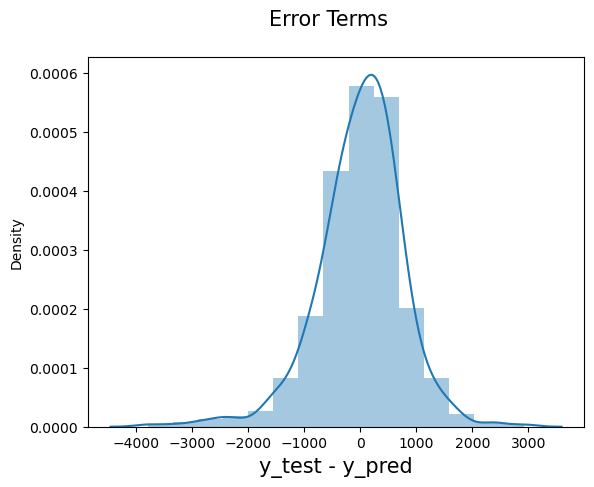

In [48]:
fig = plt.figure()
sns.distplot(res, bins = 15)               # Setting histogram with 15 bins
fig.suptitle('Error Terms', fontsize = 15)       # Plot Heading
plt.xlabel('y_test - y_pred', fontsize = 15)     # Setting X-Labels 

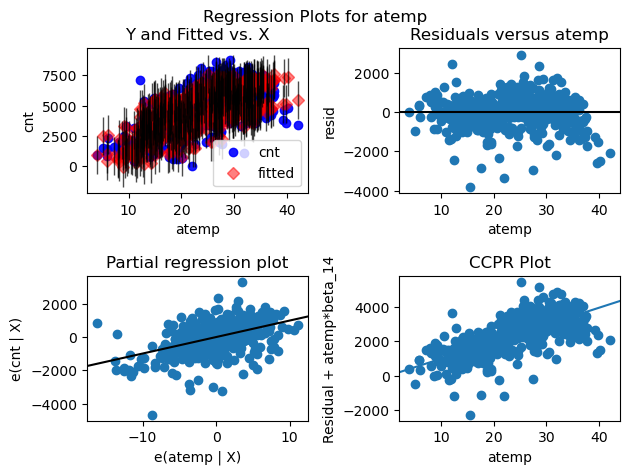

In [49]:
# Checking for assumption that error terms are independent of each other, X, and y
fig_2 = plt.figure()
fig_2 = sm.graphics.plot_regress_exog(OLS_model, 'atemp', fig=fig_2)

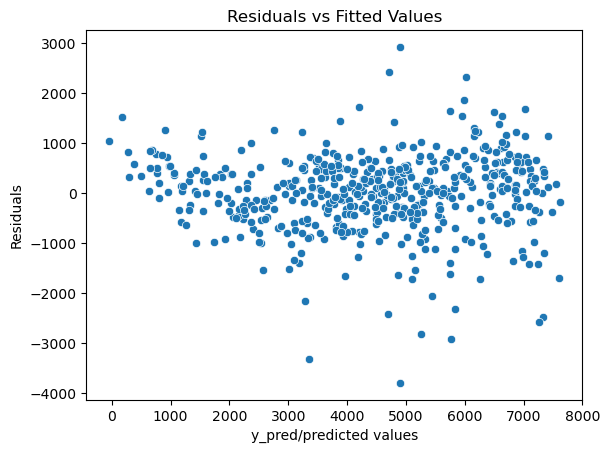

In [50]:
# Plotting residuals vs fitted values for homoscedasticity validation
p = sns.scatterplot(x=y_pred_train, y=res)  # create a scatter plot
plt.xlabel('y_pred/predicted values') # label the x axis
plt.ylabel('Residuals') # label the y-axis
p = plt.title('Residuals vs Fitted Values') # give plot a title


### Prediction on Test Set

In [51]:
# Importing required metrics to evaluate our model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [52]:
np.sqrt(mean_squared_error(y_test, y_pred))  #Square root of Mean Squared Error

778.4781877754994

In [53]:
r_squared = r2_score(y_test, y_pred) # r2 Score for our Model is very good at .831

In [54]:
r_squared

0.8311122382298118

### Conclusions
* Our Multiple Linear Regression Model is able to explain over 83% of variance in our data set.
* Our MLR Model has 16 features that are used to predict the total count of bike sharing rides.

### Decision Tree Model

In [55]:
# Importing the necessary libraries 
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

params = {
    'max_depth' : range(2, 10, 2),
    'min_samples_leaf' : range(20, 80, 10),
    'min_samples_split' : range(20, 80, 10),
    'criterion' : ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
}


In [56]:
n_folds = 5
dtree_model = DecisionTreeRegressor()

In [57]:
grid = GridSearchCV(dtree_model, params, cv = n_folds, n_jobs = -1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': range(2, 10, 2),
                         'min_samples_leaf': range(20, 80, 10),
                         'min_samples_split': range(20, 80, 10)})

In [58]:
grid.best_params_

{'criterion': 'poisson',
 'max_depth': 8,
 'min_samples_leaf': 20,
 'min_samples_split': 20}

In [59]:
grid.best_score_

0.7547119555507178

In [60]:
best_grid = grid.best_estimator_

In [61]:
best_grid

DecisionTreeRegressor(criterion='poisson', max_depth=8, min_samples_leaf=20,
                      min_samples_split=20)

In [62]:
best_grid.fit(X_train, y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=8, min_samples_leaf=20,
                      min_samples_split=20)

In [63]:
best_grid.score(X_test, y_test)

0.8123370089963776

### Visualizing The Decision Tree

In [64]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

In [65]:
features = list(X.columns)

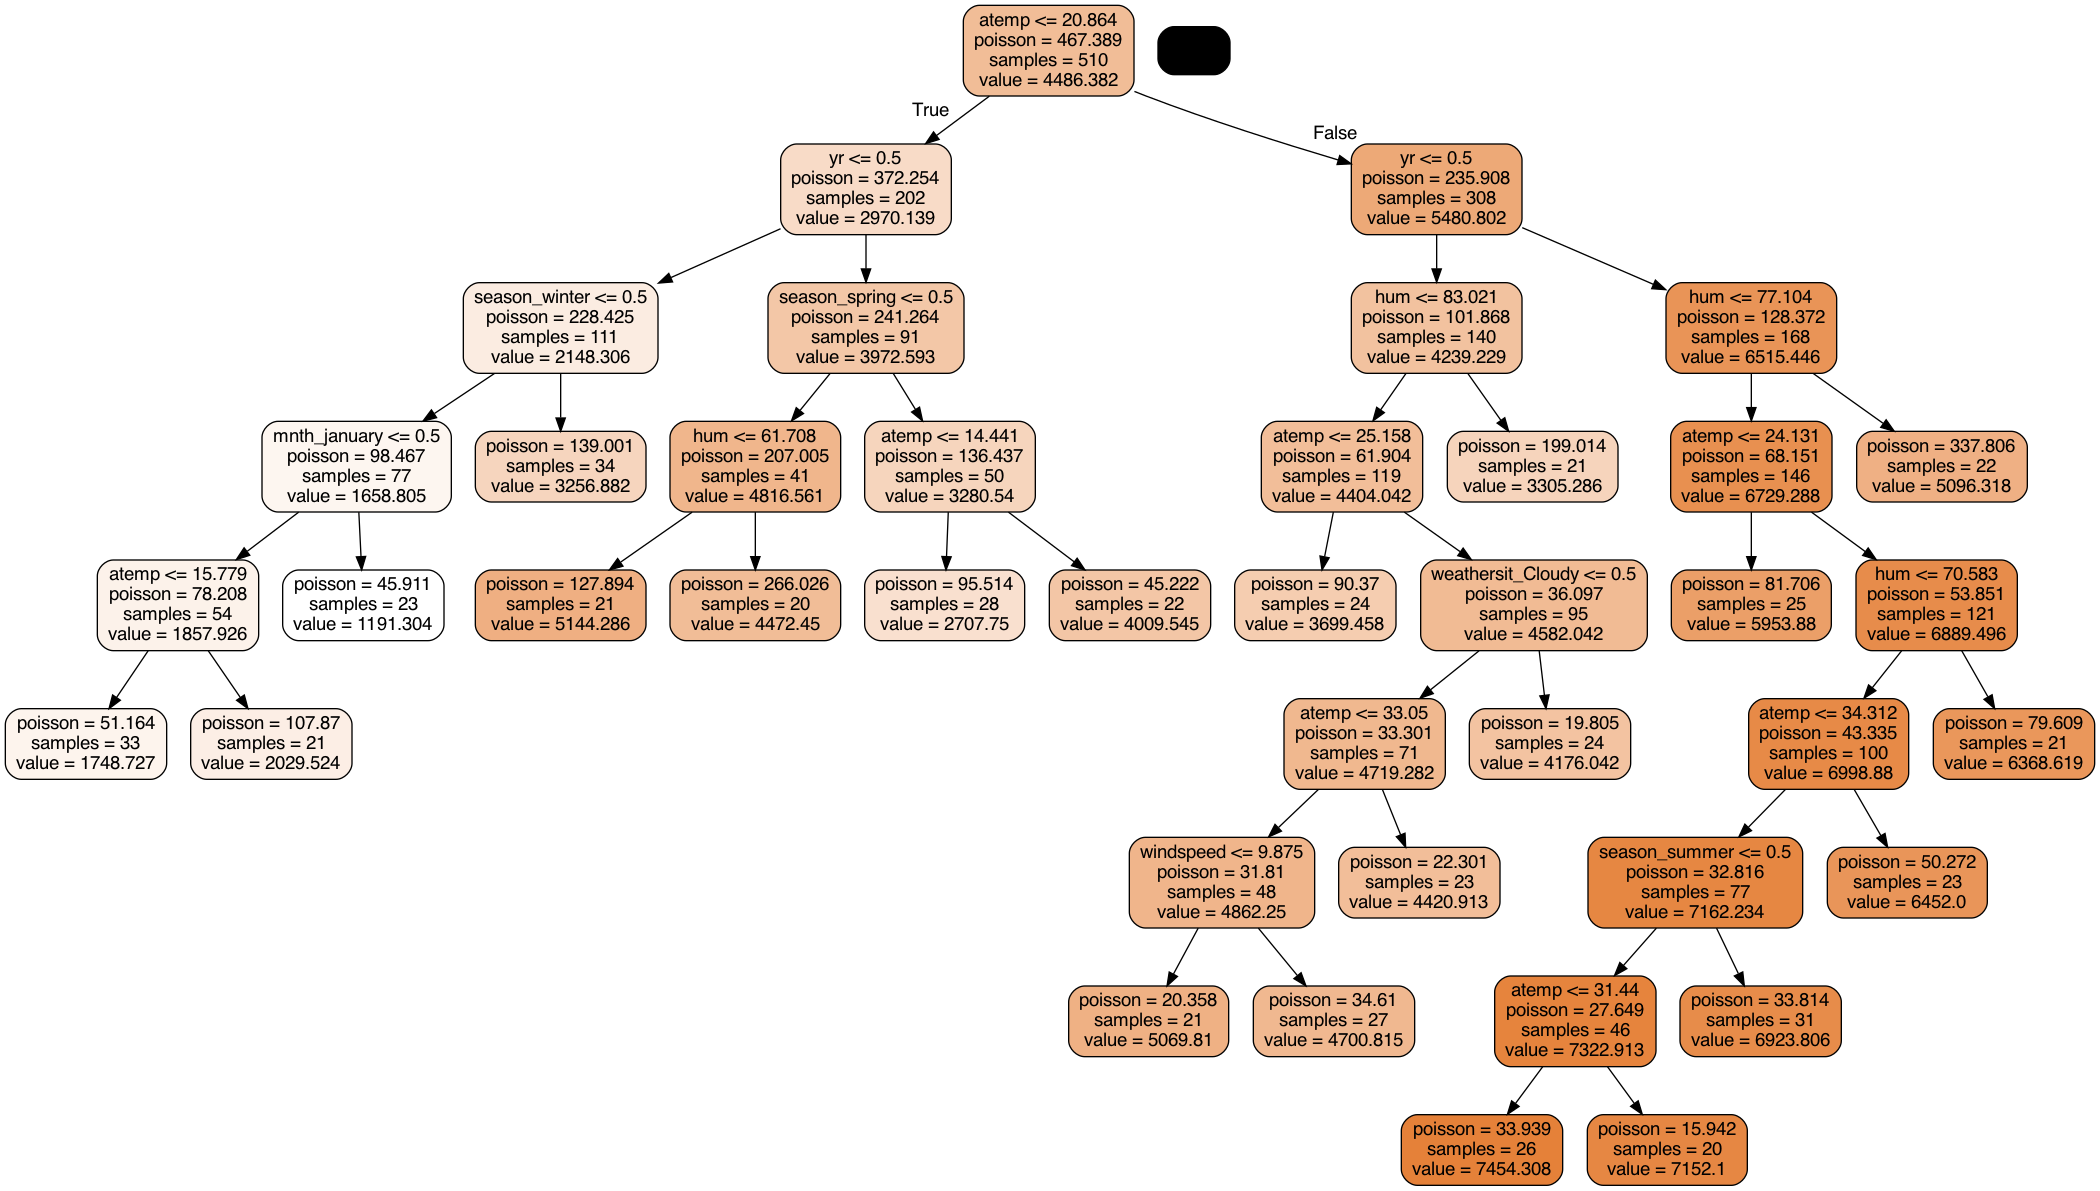

In [66]:
dot_data = StringIO()
export_graphviz(best_grid, out_file = dot_data, feature_names = features, filled = True, rounded = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())